### Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Import Libraries](#chapter1)
* [Import data](#chapter2)
* [Data Pre-Processing](#chapter3)
* [Setting relevant variables](#chapter4)
* [Aim 1 main code](#chapter5)
* [Aim 3 main code](#chapter6)


### Import Libraries <a class="anchor" id="chapter1"></a>
[Go back to the Table of Contents](#table_of_contents)

In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import seaborn as sns
from datetime import datetime

### Import data <a class="anchor" id="chapter2"></a>
[Go back to the Table of Contents](#table_of_contents)

In [476]:
#import the df
LOCAL_PATH = r'C:/Users/tom3r/OneDrive/Desktop/GCCR/GCCR003_pre-pst-merge_deID_dd_dn_manualcln_v1.csv'
PLATFORM_PATH = r'INSERT HERE YOUR PATH'
try:
    data = pd.read_csv(LOCAL_PATH,encoding= 'unicode_escape')
except:
    data = pd.read_csv(PLATFORM_PATH,encoding= 'unicode_escape')

30
13



### Data Pre-Processing <a class="anchor" id="chapter3"></a>
[Go back to the Table of Contents](#table_of_contents)

In [ ]:
# Dates timestamp corrected


# problems['Email_Time_Stamp_y'] =  pd.to_datetime(problems['Email_Time_Stamp_y'], format='%Y%m%d')
data['Email_Time_Stamp_y'] =  pd.to_datetime(data['Email_Time_Stamp_y'])
data['Email_Time_Stamp_y'] =  data["Email_Time_Stamp_y"].dt.strftime("%Y/%m/%d")
data['Email_Time_Stamp_y'] =  pd.to_datetime(data['Email_Time_Stamp_y'],dayfirst=True)

# datetime.strptime(data["Date_of_onset"], "%m/%d/%Y").strftime("%Y-%m-%d")
# data["Date_of_onset"]

data["Date_of_onset"] = pd.to_datetime(data["Date_of_onset"])
data['Date_of_onset'] =  data["Date_of_onset"].dt.strftime("%Y/%m/%d")
data["Date_of_onset"] = pd.to_datetime(data["Date_of_onset"],dayfirst=True)

# print(problems['DurationInDays'].head(1))
# print(problems['Email_Time_Stamp_y'].head(1))
# print(problems['Date_of_onset'].tail(15))

# data["Date_of_onset"] = pd.to_datetime(data["Date_of_onset"], dayfirst=True)
# problems["Email_Time_Stamp_y"] = pd.to_datetime(problems["Email_Time_Stamp_y"], dayfirst=True)


data["Date_of_onset_Time_Stamp"] = pd.to_datetime(data["Date_of_onset_Time_Stamp"])
data['Date_of_onset_Time_Stamp'] =  data["Date_of_onset_Time_Stamp"].dt.strftime("%Y/%m/%d")
data["Date_of_onset_Time_Stamp"] = pd.to_datetime(data["Date_of_onset_Time_Stamp"],dayfirst=True)


data['Duration'] = ((data['Date_of_onset_Time_Stamp'] - data['Date_of_onset']).dt.total_seconds() / (60 * 60 * 24))
data['Duration'].hist()

data = data.dropna(subset=['Date_of_onset', 'Email_Time_Stamp_y'])

#exclde individuals with data before 2019
data = data[data['Date_of_onset'].dt.year > 2018]

In [514]:

# EXPLORATORY
# data['Smell_before_illness'].hist() #was asked in group meeting of 22/2/2021
#cutoff seems to be perfect at 40%

# postive_1 = data.query('COVID_diagnosis_x == 2 or COVID_diagnosis_x == 3')
# postive_1.COVID_diagnosis_y.value_counts()

# nan_rows = len(data[data['COVID_diagnosis_x'].isnull()])
# print(nan_rows)

# nan_rows = len(data[data['COVID_diagnosis_y'].isnull()])
# print(nan_rows)

illness_higher_current = covid_positive.query('Smell_during_illness > Smell_current')



### Setting relevant variables <a class="anchor" id="chapter4"></a>
[Go back to the Table of Contents](#table_of_contents)

In [480]:
data['DurationInDays'] = ((data['Email_Time_Stamp_y'] - data['Date_of_onset']).dt.total_seconds() / (60 * 60 * 24))

data['percentage_recovery_smell'] = data['Smell_current'] / data['Smell_before_illness'] * 100
data['percentage_recovery_taste'] = data['Taste_current'] / data['Taste_before_illness'] * 100


data['onset_to_first_q'] = data['Date_of_onset_Time_Stamp'] - data['Date_of_onset']

onset_to_q = data.plot.scatter(x='onset_to_first_q',y='percentage_recovery_smell')

symptom_columns = ["Symptoms_fever_","Symptoms_dry_cough_","Symptoms_cough_with_mucus_","Symptoms_difficulty_breathing_/_shortness_of_breath_","Symptoms_chest_tightness_","Symptoms_runny_nose_","Symptoms_sore_throat_","Symptoms_changes_in_food_flavor_","Symptoms_changes_in_smell_","Symptoms_loss_of_appetite_","Symptoms_headache_","Symptoms_muscle_aches_","Symptoms_fatigue_","Symptoms_diarrhea_","Symptoms_abdominal_pain_","Symptoms_nausea_"]

### Define long hauler

In [483]:
def islonghauler(row):
    percent_smell_recovery = row['percentage_recovery_smell']
    percent_taste_recovery = row['percentage_recovery_taste']
    long_hauler = 0
    
    if (percent_smell_recovery <= 80)  or (percent_taste_recovery<= 80):
        long_hauler =1
    else:
        long_hauler =0
    return long_hauler

data['longhauler']=data.apply(islonghauler,axis=1)

In [379]:
covid_positive = data.copy()
covid_positive = covid_positive.query('COVID_diagnosis_y == 2')


In [380]:
nan_rows = covid_positive[covid_positive['Email_Time_Stamp_y'].isnull()]
nan_rows

,Unnamed: 0,Test_Name_x,Sample_Set_Number_x,Year_of_birth,Year_of_birth_Time_Stamp,Country_of_Residence,Country_of_Residence_Time_Stamp,City_of_Residence,City_of_Residence_Time_Stamp,Gender,...,Email_Time_Stamp_y,Sample_Completion_Time,Unnamed: 0.1,DurationInDays,onset_to_first_q,percentage_recovery_smell,percentage_recovery_taste,time_onset_timestmp_followup_timestmp,percentage_recovery_illness_to_current_smell,longhauler


### Aim 1 main code <a class="anchor" id="chapter5"></a>
[Go back to the Table of Contents](#table_of_contents)

* Separate classifications of “return to normal” will be created for taste and for smell.
* We will a) perform survival analysis for chemosensory long haulers, using time in days between the date of onset of initial symptoms and the completion day of the follow-up survey.
* We will also b) use linear regression to predict the difference score using the degree of loss in an initial survey and in a follow-up survey, controlling for time passed between the two surveys.


In [382]:
# create new dataframe variables
smell_df = covid_positive[['DurationInDays', 'Smell_before_illness', 'Smell_current', 'longhauler']]
taste_df = covid_positive[['DurationInDays', 'Taste_before_illness', 'Taste_current', 'longhauler']]


In [383]:
# drop nan records
smell_df = smell_df.dropna()
taste_df = taste_df.dropna()


In [384]:
# Individuals who reported severe chemosensory dysfunction pre-COVID (i.e., before illness rating <50 for “before illness rating” on the original survey) will be excluded.
smell_df = smell_df[smell_df['Smell_before_illness'] >= 50]
taste_df = taste_df[taste_df['Taste_before_illness'] >= 50]


In [385]:
# calculate recovery percentages
smell_df['percentage_recovery'] = smell_df['Smell_current'] / smell_df['Smell_before_illness'] * 100
taste_df['percentage_recovery'] = taste_df['Taste_current'] / taste_df['Taste_before_illness'] * 100


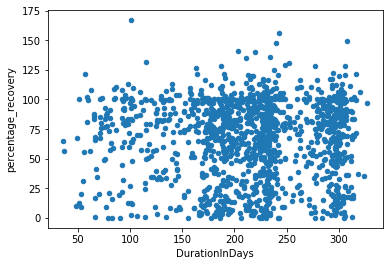

In [387]:
ax1 = smell_df.plot.scatter(x='DurationInDays',
                      y='percentage_recovery')

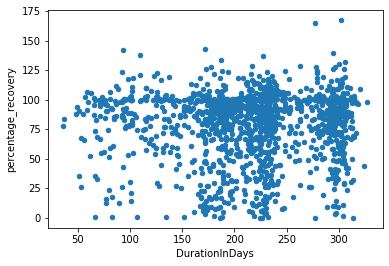

In [388]:
ax1 = taste_df.plot.scatter(x='DurationInDays',
                      y='percentage_recovery')

In [389]:
# Individuals who do not have a follow upt rating that is at least 80% of their pre-illness function rating will be classified as chemosensory long-haulers.
# Status is 0 for normal, 1 for long-haulers
# smell_df.loc[smell_df['percentage_recovery'] >= 80, 'Status'] = 0
# smell_df.loc[smell_df['percentage_recovery'] < 80, 'Status'] = 1
# taste_df.loc[taste_df['percentage_recovery'] >= 80, 'Status'] = 0
# taste_df.loc[taste_df['percentage_recovery'] < 80, 'Status'] = 1


In [390]:

smell_df["longhauler"] = smell_df["longhauler"].astype('bool')
taste_df["longhauler"] = taste_df["longhauler"].astype('bool')


In [391]:
# study for smell
smell_X = smell_df[['DurationInDays']]
smell_y = smell_df['Smell_current'] - smell_df['Smell_before_illness']


In [392]:
X_train, X_test, y_train, y_test = train_test_split(smell_X, smell_y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [0.01446245]


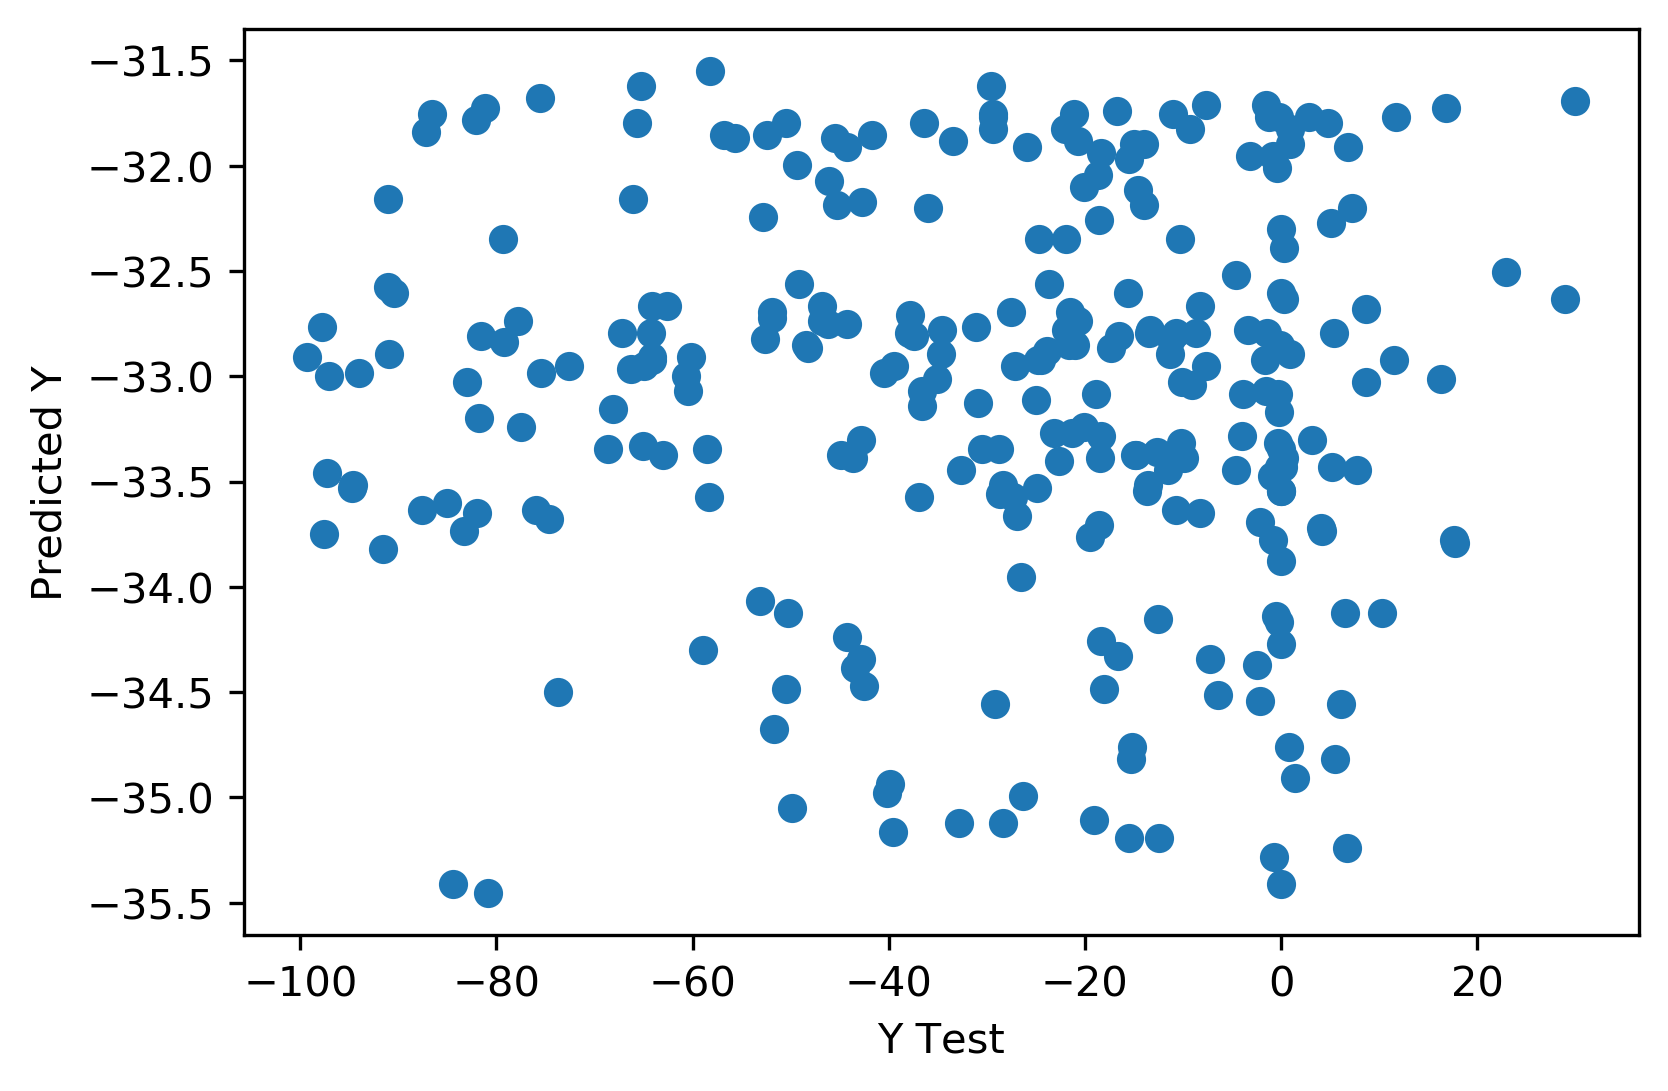

In [393]:
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.figure(dpi=300)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [394]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 25.759954262939903
MSE: 920.971578367458
RMSE: 30.34751354505766


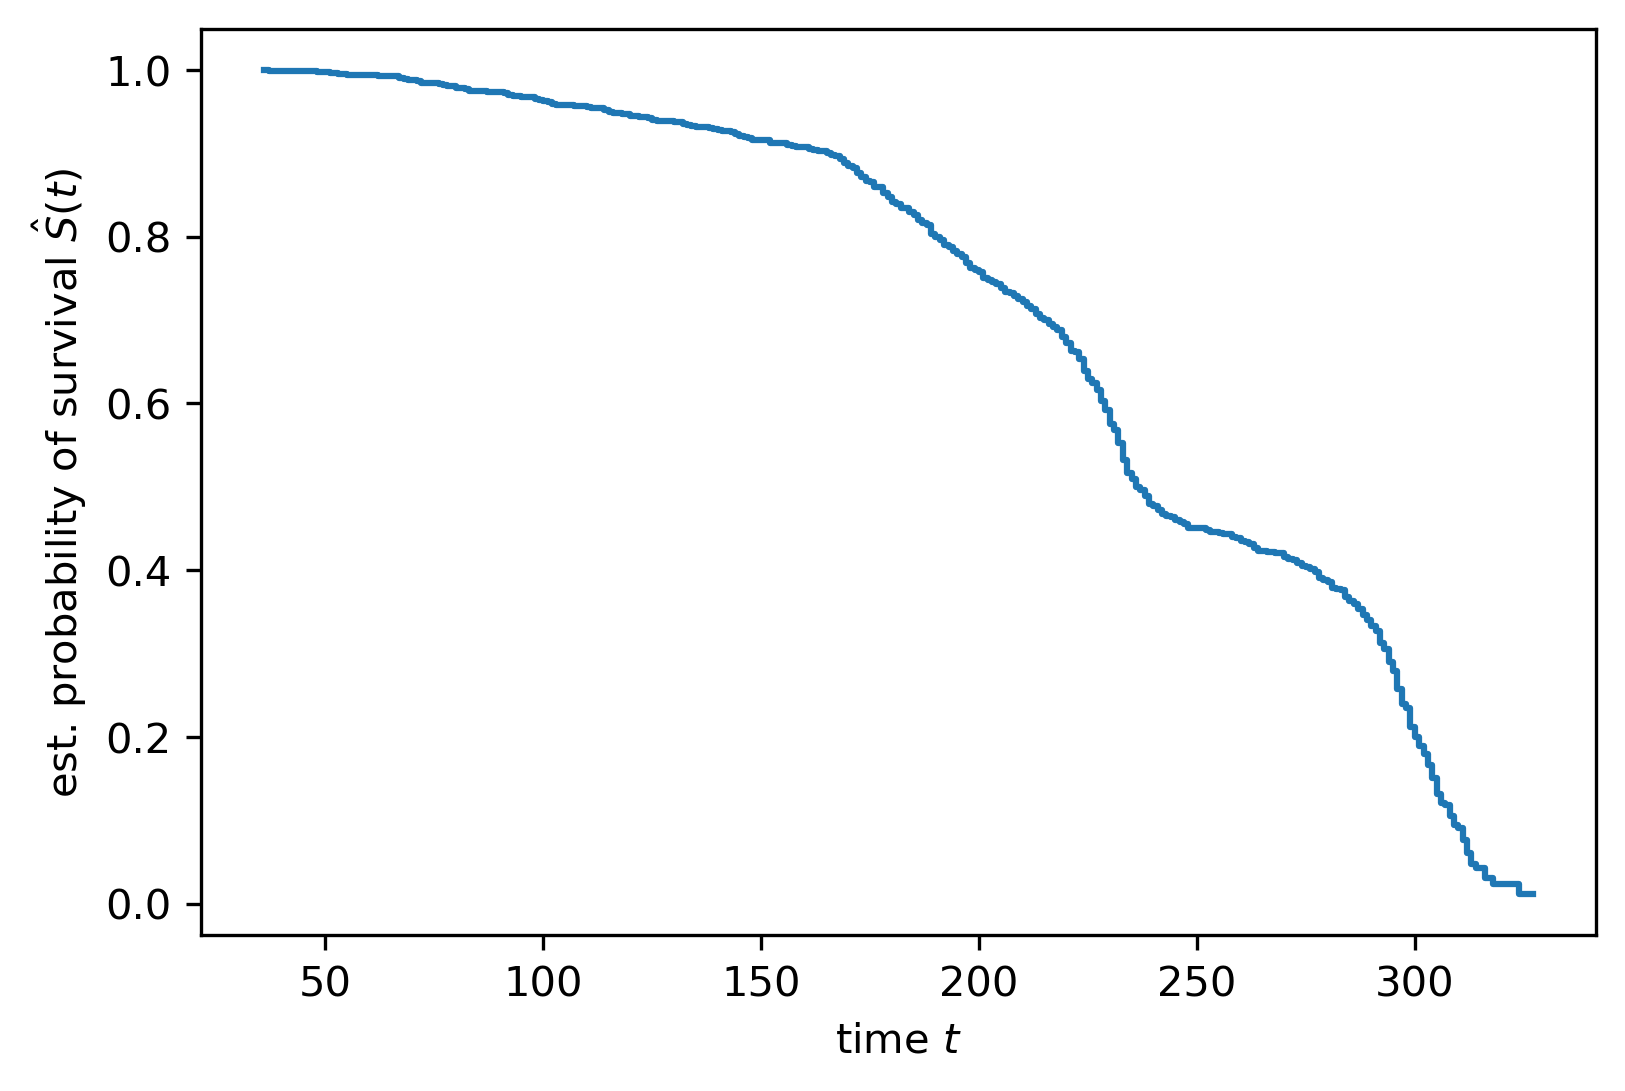

In [395]:
from sksurv.nonparametric import kaplan_meier_estimator
time, survival_prob = kaplan_meier_estimator(smell_df["longhauler"], smell_df["DurationInDays"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()


In [396]:
taste_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 3391
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DurationInDays        1385 non-null   float64
 1   Taste_before_illness  1385 non-null   float64
 2   Taste_current         1385 non-null   float64
 3   longhauler            1385 non-null   bool   
 4   percentage_recovery   1385 non-null   float64
dtypes: bool(1), float64(4)
memory usage: 55.5 KB


In [397]:

# study for taste
taste_X = taste_df[['DurationInDays']]
taste_y = taste_df['Taste_current'] - taste_df['Taste_before_illness']


In [398]:
X_train, X_test, y_train, y_test = train_test_split(taste_X, taste_y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [0.01571072]


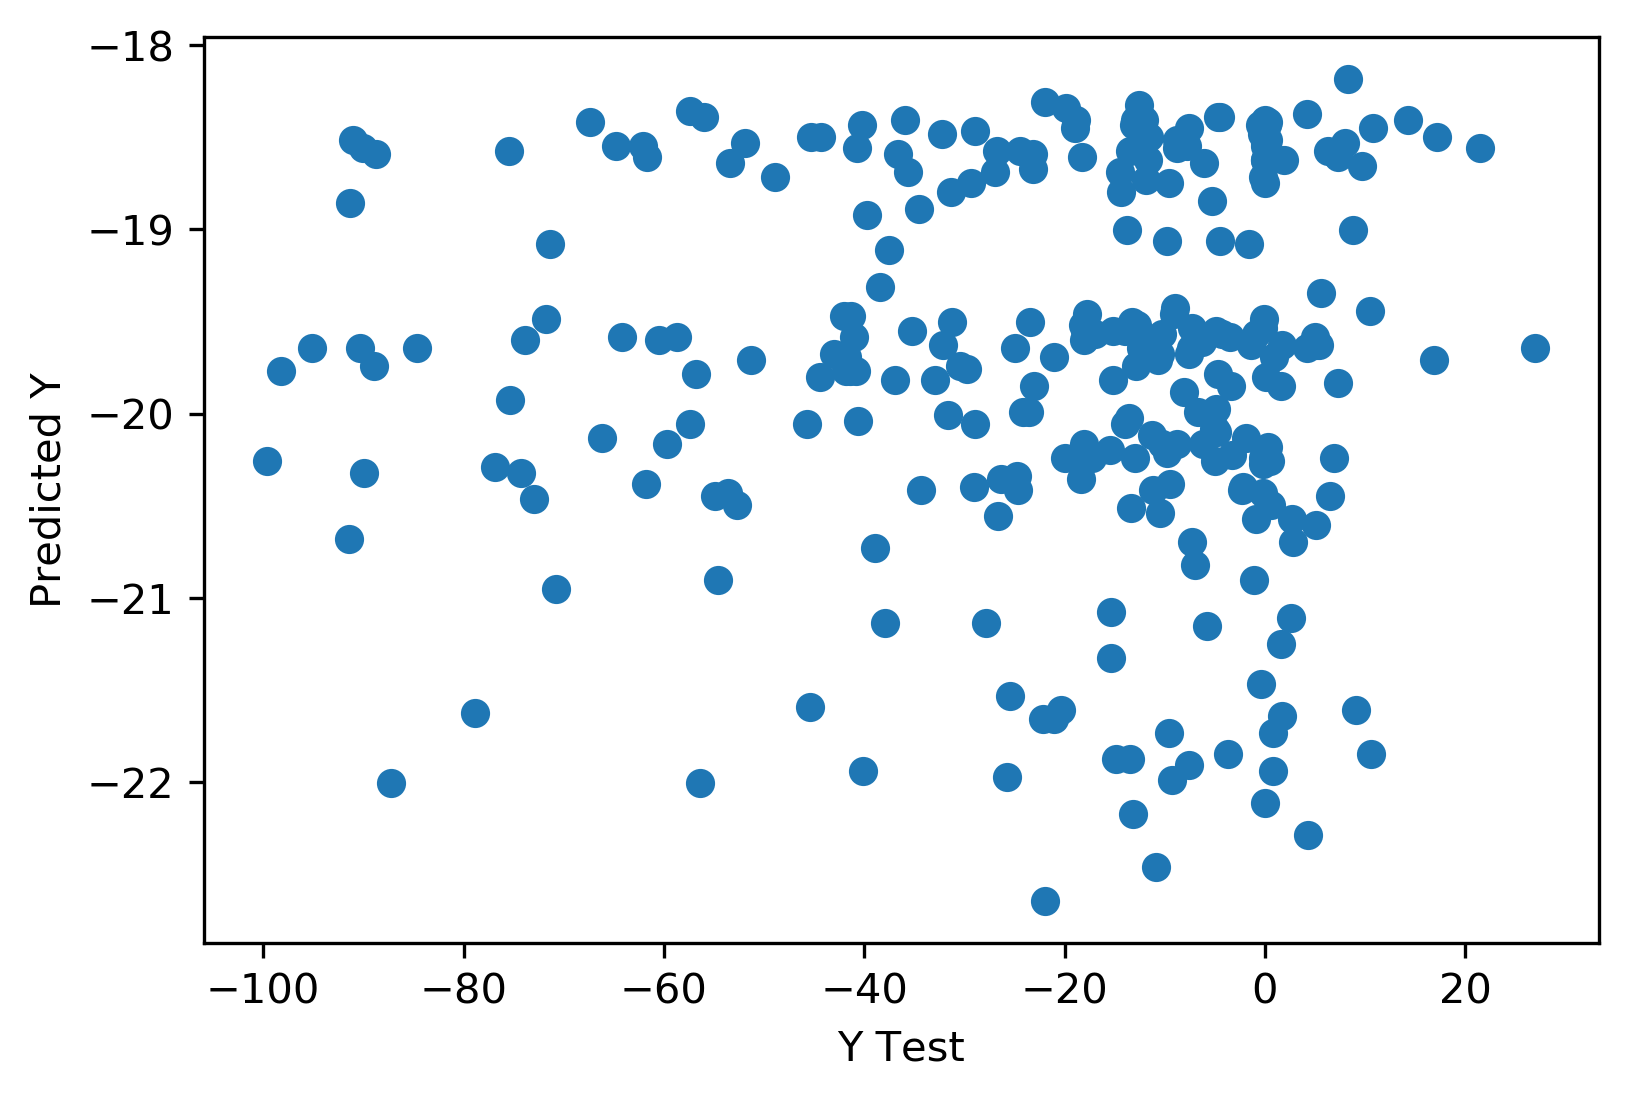

In [399]:
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)
plt.figure(dpi=300)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [400]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 20.55315194763394
MSE: 706.4648953547758
RMSE: 26.57940735522099


In [401]:
taste_df["longhauler"].head()
taste_df["longhauler"].head

<bound method NDFrame.head of 0        True
4       False
6        True
10      False
19       True
        ...  
3384     True
3385     True
3388     True
3389     True
3391    False
Name: longhauler, Length: 1385, dtype: bool>

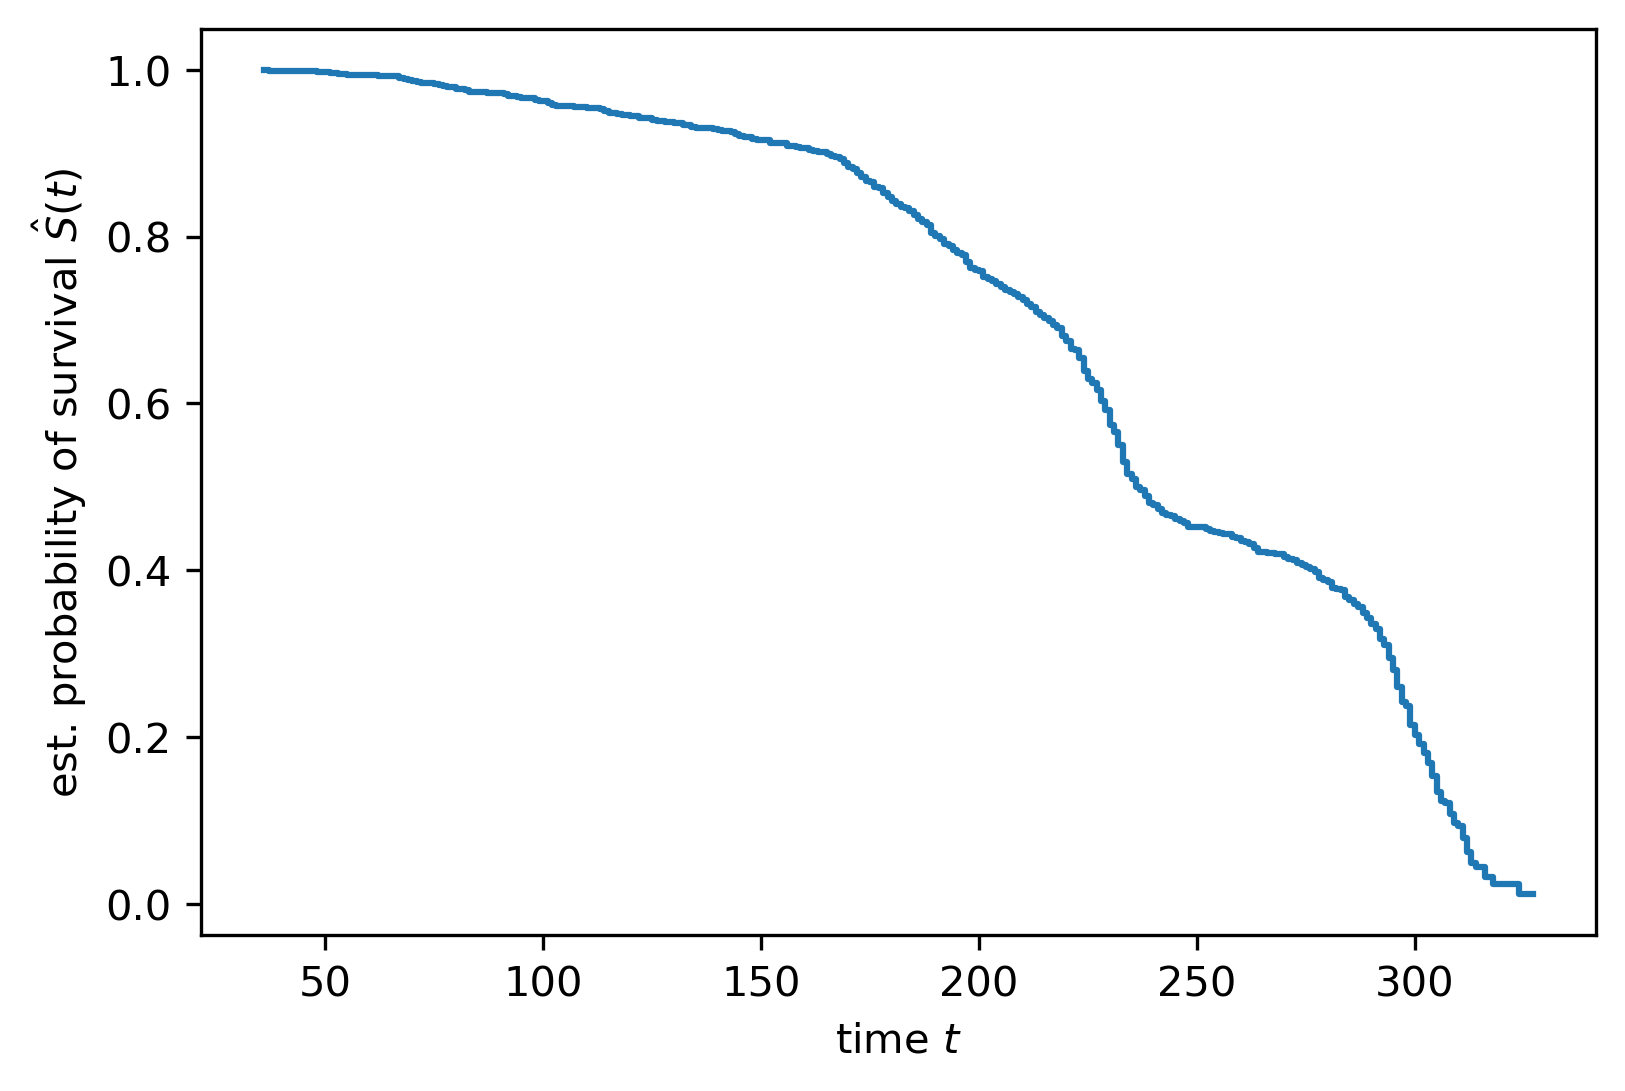

In [402]:
time, survival_prob = kaplan_meier_estimator(taste_df["longhauler"], taste_df["DurationInDays"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()

In [403]:
# data = pd.read_csv(r'C:\Users\tom3r\OneDrive\Desktop\GCCR/gccr003_data.csv',sep=';',encoding= 'unicode_escape')
# data['percentage_recovery'] = data['Smell_current'] / data['Smell_before_illness'] * 100
# data['long_hauler'] = data['percentage_recovery'].apply(lambda x: 1 if x > 80 else 0)


In [404]:
# smell_df = data[['DurationInDays', 'Smell_before_illness', 'Smell_current', 'Status']]
# taste_df = data[['DurationInDays', 'Taste_before_illness', 'Taste_current', 'Status']]

# Michelle idea covid negative analysis aim 1

In [405]:
covid_negative = data.copy()
covid_negative = covid_negative.query('COVID_diagnosis_y == 3 or COVID_diagnosis_y == 4')


In [406]:
# covid_negative

In [407]:
# create new dataframe variables
smell_df_neg = covid_negative[['DurationInDays', 'Smell_before_illness', 'Smell_current', 'longhauler']]
taste_df_neg = covid_negative[['DurationInDays', 'Taste_before_illness', 'Taste_current', 'longhauler']]


In [408]:
smell_df_neg = smell_df_neg[smell_df_neg['Smell_before_illness'] >= 50]
taste_df_neg = taste_df_neg[taste_df_neg['Taste_before_illness'] >= 50]


In [409]:
smell_df_neg = smell_df_neg.dropna()
taste_df_neg = taste_df_neg.dropna()


In [410]:
smell_df_neg['percentage_recovery'] = smell_df_neg['Smell_current'] / smell_df_neg['Smell_before_illness'] * 100
taste_df_neg['percentage_recovery'] = taste_df_neg['Taste_current'] / taste_df_neg['Taste_before_illness'] * 100

In [411]:

smell_df_neg["longhauler"] = smell_df_neg["longhauler"].astype('bool')
taste_df_neg["longhauler"] = taste_df_neg["longhauler"].astype('bool')


In [412]:
smell_X = smell_df_neg[['DurationInDays']]
smell_y = smell_df_neg['Smell_current'] - smell_df_neg['Smell_before_illness']


In [413]:
# X_train, X_test, y_train, y_test = train_test_split(smell_X, smell_y, test_size=0.2)
# lm = LinearRegression()
# lm.fit(X_train, y_train)


In [414]:
# print('Coefficients: \n', lm.coef_)
# predictions = lm.predict(X_test)
# plt.figure(dpi=300)
# plt.scatter(y_test, predictions)
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()

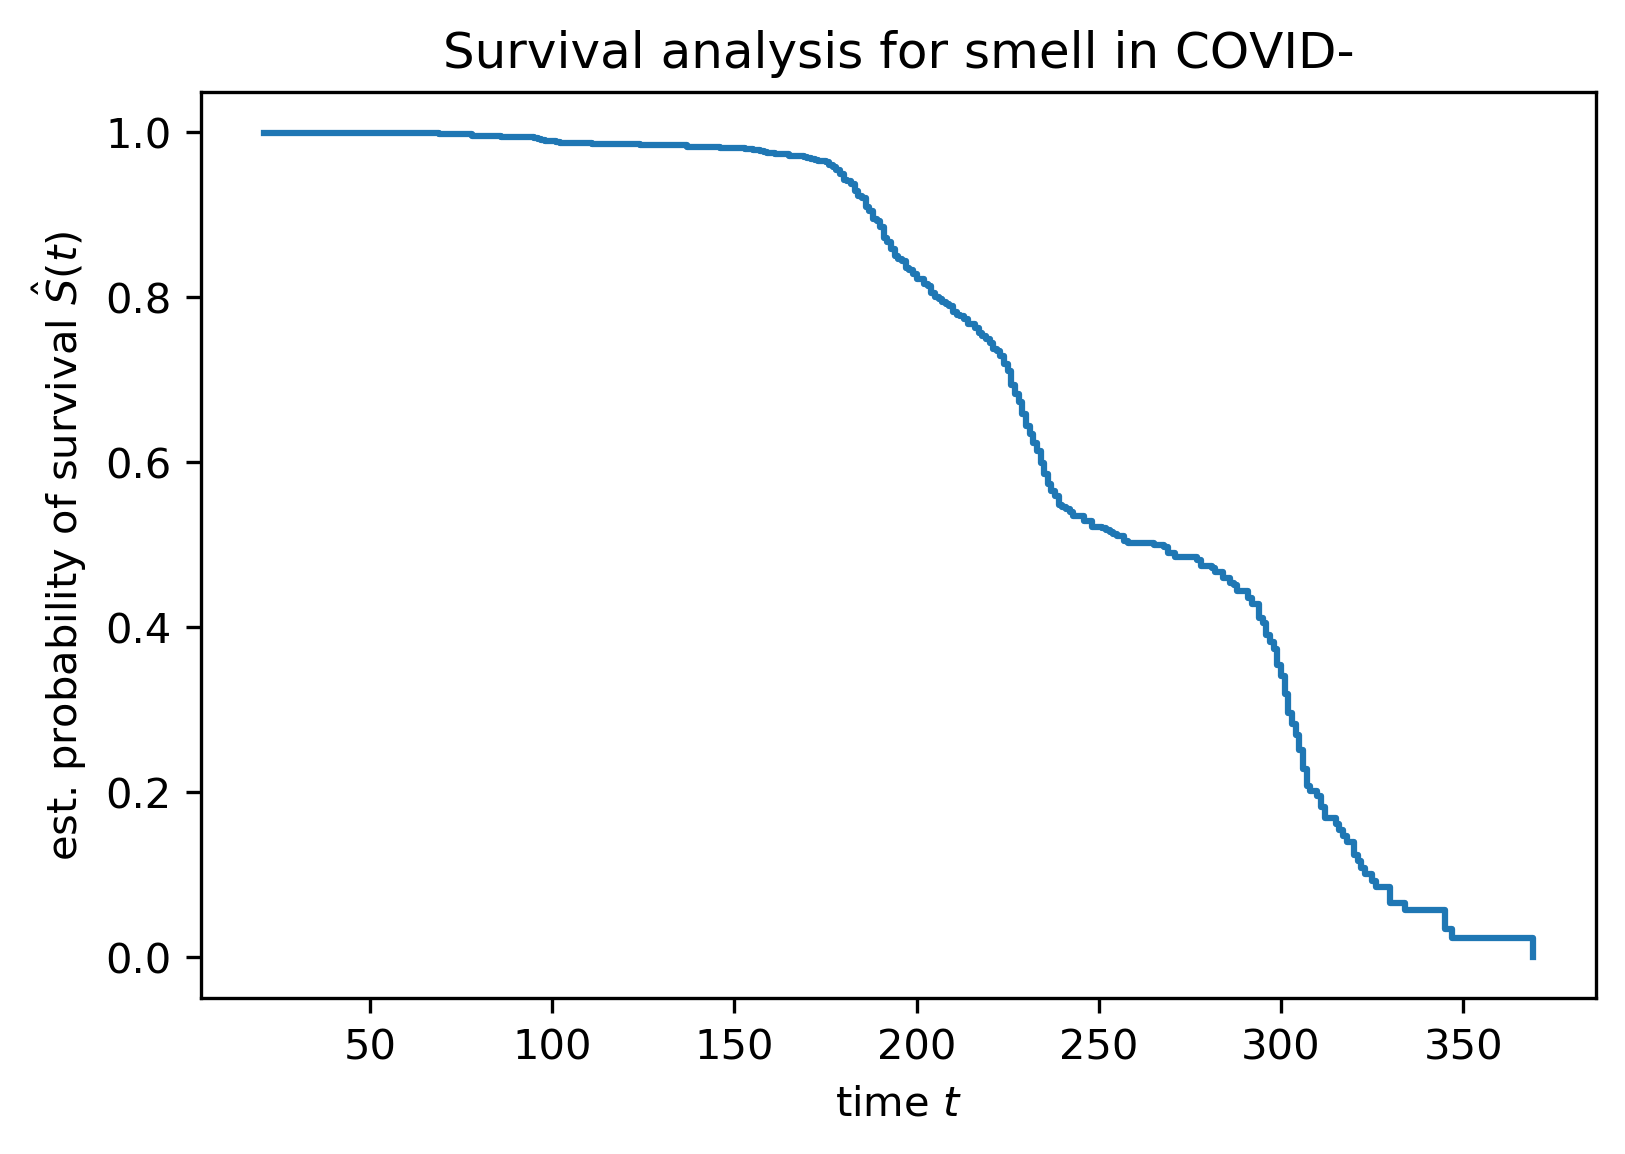

In [415]:
from sksurv.nonparametric import kaplan_meier_estimator
time, survival_prob = kaplan_meier_estimator(smell_df_neg["longhauler"], smell_df_neg["DurationInDays"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Survival analysis for smell in COVID-')

plt.show()


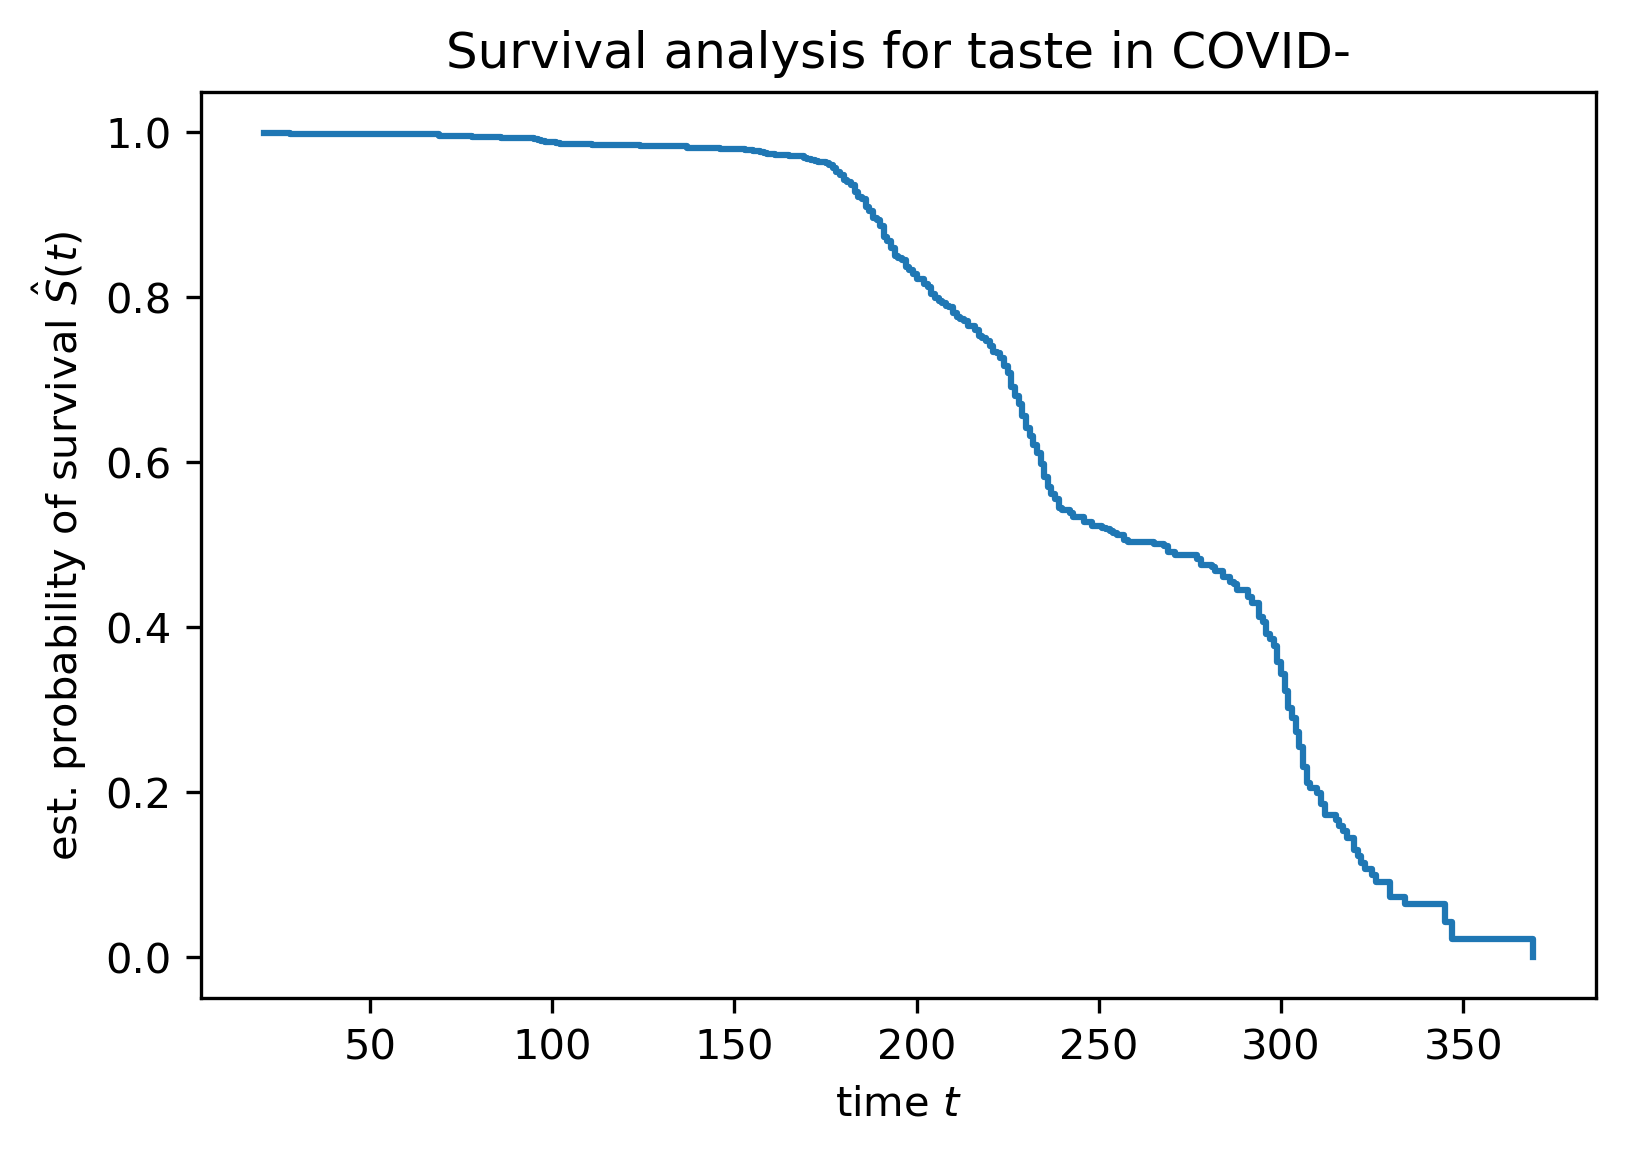

In [416]:
time, survival_prob = kaplan_meier_estimator(taste_df_neg["longhauler"], taste_df_neg["DurationInDays"])
plt.figure(dpi=300)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Survival analysis for taste in COVID-')
plt.show()



### Aim 3 main code <a class="anchor" id="chapter6"></a>
[Go back to the Table of Contents](#table_of_contents)

# Import data

In [417]:
new_df = pd.read_csv(r'C:/Users/tom3r/OneDrive/Desktop/GCCR/GCCR003_pre-pst-merge_deID_dd_dn_manualcln_v1.csv',encoding= 'unicode_escape')
print(len(new_df))
new_df = new_df.query('Smell_before_illness >= 50')
new_df = new_df.query('Taste_before_illness >= 50')
print(len(new_df))


3392
3213


# Change data types

In [418]:
data["Date_of_onset"] = pd.to_datetime(data["Date_of_onset"], dayfirst=True)
data["Email_Time_Stamp_y"] = pd.to_datetime(data["Email_Time_Stamp_y"], dayfirst=True)

# smell and taste change variables

In [419]:
new_df['percentage_recovery_smell'] = new_df['Smell_current'] / new_df['Smell_before_illness'] * 100
new_df['percentage_recovery_taste'] = new_df['Taste_current'] / new_df['Taste_before_illness'] * 100

# Long hauler

In [420]:
def islonghauler(row):
    percent_smell_recovery = row['percentage_recovery_smell']
    percent_taste_recovery = row['percentage_recovery_taste']
    long_hauler = 0
    
    if (percent_smell_recovery <= 80)  or (percent_taste_recovery<= 80):
        long_hauler =1
    else:
        long_hauler =0
    return long_hauler


In [421]:
new_df['longhauler']=new_df.apply(islonghauler,axis=1)
covid_positive = new_df.copy()
covid_positive = covid_positive.query('COVID_diagnosis_y == 2')


# Only long haulers

In [422]:
# longhauler_df = new_df.query('longhauler == 1') # old

In [423]:
covid_positive_long_haulers = covid_positive.query('longhauler == 1')

In [424]:
symptom_columns = ["Symptoms_fever_y","Symptoms_dry_cough_y","Symptoms_cough_with_mucus_y","Symptoms_difficulty_breathing_/_shortness_of_breath_y","Symptoms_chest_tightness_y","Symptoms_runny_nose_y","Symptoms_sore_throat_y","Symptoms_changes_in_food_flavor_y","Symptoms_changes_in_smell_y","Symptoms_loss_of_appetite_y","Symptoms_headache_y","Symptoms_muscle_aches_y","Symptoms_fatigue_y","Symptoms_diarrhea_y","Symptoms_abdominal_pain_y","Symptoms_nausea_y"]

In [425]:
# new_df['Symptoms_no_symptoms_x'].size # old

covid_positive.longhauler.value_counts()

# len(covid_positive.longhauler)

1    900
0    600
Name: longhauler, dtype: int64

In [426]:
# longhauler_df['Symptoms_no_symptoms_x'].value_counts()

In [427]:
# longhauler_df['Symptoms_no_symptoms_y'].value_counts()

In [494]:
def symptom_definer(row):
#     no_symptoms_before = 0
#     no_symptoms_after = 0
    current = 0
    first_no_symp = row['Symptoms_no_symptoms_x']
    second_no_symp = row['Symptoms_no_symptoms_y']
    if (first_no_symp ==0) & (second_no_symp==1):
        current = 'recovered' #recovered
    if (first_no_symp ==1) & (second_no_symp==1):
         current = "didnt_have_at_all" #recovered
    if (first_no_symp ==1) & (second_no_symp==0):
         current = "got_symptoms_followup" #recovered
    if (first_no_symp ==0) & (second_no_symp==0):
        current = "still_has_symptoms" #recovered
    if (first_no_symp ==0) & (pd.isnull(second_no_symp)):
        current = "first_sym_second_null" #recovered
    if (first_no_symp ==1) & (pd.isnull(second_no_symp)):
        current = "first_no_sym_second_null" #recovered   
    if (pd.isnull(first_no_symp)) & (pd.isnull(second_no_symp)):
        current = "nulls" #recovered  
    if (pd.isnull(first_no_symp)) & (second_no_symp==1):
        current = "nulls" #recovered  
    if (pd.isnull(first_no_symp)) & (second_no_symp==0):
        current = "nulls" #recovered  
    return current

# new_df['symptoms']=new_df.apply(symptom_definer,axis=1)
covid_positive_long_haulers['symptoms']=covid_positive_long_haulers.apply(symptom_definer,axis=1)

In [495]:
covid_positive_long_haulers

,Unnamed: 0,Test_Name_x,Sample_Set_Number_x,Year_of_birth,Year_of_birth_Time_Stamp,Country_of_Residence,Country_of_Residence_Time_Stamp,City_of_Residence,City_of_Residence_Time_Stamp,Gender,...,Comment_-_COIVD-19__progression_Time_Stamp,Other_info_-_open_end_y,Other_info_-_open_end_Time_Stamp_y,Email_Time_Stamp_y,Sample_Completion_Time,Unnamed: 0.1,percentage_recovery_smell,percentage_recovery_taste,longhauler,symptoms
0,3039,Smell & Taste Loss in potential COVID19 patien...,1996,1971,4/16/2020 3:50,United Kingdom,4/16/2020 3:51,London,4/16/2020 3:51,0,...,9/24/2020 14:46,Please can someone make this go away!!!,9/24/2020 14:47,9/24/2020 14:31,NaN,NaN,34.636872,36.081370,1,still_has_symptoms
6,2692,Smell & Taste Loss in potential COVID19 patien...,3729,1985,4/9/2020 16:45,United States,4/9/2020 16:45,New Jersey,4/9/2020 16:45,0,...,9/24/2020 14:49,None,9/24/2020 14:49,9/24/2020 14:41,NaN,NaN,71.705822,82.100000,1,recovered
19,4175,Smell & Taste Loss in potential COVID19 patien...,4604,1963,6/25/2020 7:24,UK,6/25/2020 7:25,North West England,6/25/2020 7:25,0,...,9/24/2020 15:26,You did not ask specifically whether the loss ...,9/24/2020 15:27,9/24/2020 15:11,NaN,NaN,8.800000,54.300000,1,recovered
20,2689,Smell & Taste Loss in potential COVID19 patien...,3665,1953,4/9/2020 15:20,United States,4/9/2020 15:20,Dobbs Ferry NY,4/9/2020 15:20,0,...,9/24/2020 15:29,None,9/24/2020 15:29,9/24/2020 15:14,NaN,NaN,79.510703,78.800000,1,still_has_symptoms
21,2599,Smell & Taste Loss in potential COVID19 patien...,1303,1972,4/8/2020 18:19,United States,4/8/2020 18:20,"Taylor, Michigan",4/8/2020 18:20,0,...,9/24/2020 15:30,None,9/24/2020 15:30,9/24/2020 15:26,NaN,NaN,65.987780,100.000000,1,recovered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,12,Smell & Taste Loss in potential COVID19 patien...,5320,1994,5/2/2020 22:36,Per??,5/2/2020 22:37,Lima /Per??,5/2/2020 22:37,0,...,1/19/2021 0:40,si que me ayuden a recuperarme y que me puedan...,1/19/2021 0:40,1/19/2021 0:33,NaN,4252.0,15.773196,25.869263,1,still_has_symptoms
3384,0,Smell & Taste Loss in potential COVID19 patien...,4067,1954,4/9/2020 22:18,United States,4/9/2020 22:18,Anchorage AK,4/9/2020 22:18,0,...,1/8/2021 16:01,None,1/8/2021 16:01,1/8/2021 15:47,NaN,1635.0,43.300000,68.700000,1,still_has_symptoms
3385,5,Smell & Taste Loss in potential COVID19 patien...,2712,1972,4/18/2020 15:26,England,4/18/2020 15:26,Bishops Stortford,4/18/2020 15:26,0,...,1/8/2021 17:18,No,1/8/2021 17:18,1/8/2021 16:48,NaN,1741.0,80.941950,72.964824,1,still_has_symptoms
3388,8,Smell & Taste Loss in potential COVID19 patien...,2918,1993,6/14/2020 1:09,USA,6/14/2020 1:09,Tarrant county,6/14/2020 1:09,0,...,9/24/2020 21:22,None,9/24/2020 21:22,9/24/2020 21:14,NaN,619.0,33.100000,29.800000,1,still_has_symptoms


In [496]:
# longhauler_df.symptoms.value_counts()
covid_positive_long_haulers.symptoms.value_counts()

still_has_symptoms       671
recovered                222
first_sym_second_null      7
Name: symptoms, dtype: int64

In [430]:
# new_df['COVID_diagnosis_x'].value_counts().reset_index()

In [431]:
# new_df['COVID_diagnosis_y'].value_counts().reset_index()

In [432]:
new_df['longhauler'].value_counts()

1    1815
0    1398
Name: longhauler, dtype: int64

In [433]:
symptoms = covid_positive.groupby('longhauler').agg({"Symptoms_fever_y": ['sum','count']}).reset_index()
symptoms

longhauler Symptoms_fever_y      
                          sum count
0          0              1.0   563
1          1              7.0   893

In [435]:
symptom_columns = ["Symptoms_fever_","Symptoms_dry_cough_","Symptoms_cough_with_mucus_","Symptoms_difficulty_breathing_/_shortness_of_breath_","Symptoms_chest_tightness_","Symptoms_runny_nose_","Symptoms_sore_throat_","Symptoms_changes_in_food_flavor_","Symptoms_changes_in_smell_","Symptoms_loss_of_appetite_","Symptoms_headache_","Symptoms_muscle_aches_","Symptoms_fatigue_","Symptoms_diarrhea_","Symptoms_abdominal_pain_","Symptoms_nausea_"]

# Long hauler group of symptoms plot loop

Symptoms_fever_ 
    long_hauler  count  total   percent
0            0    1.0    563  0.177620
1            1    7.0    893  0.783875


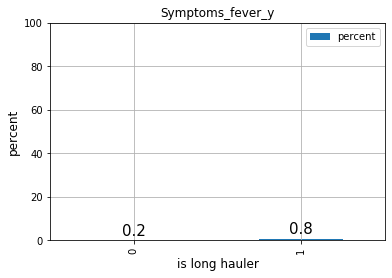

Symptoms_dry_cough_ 
    long_hauler  count  total   percent
0            0   22.0    563  3.907638
1            1   52.0    893  5.823068


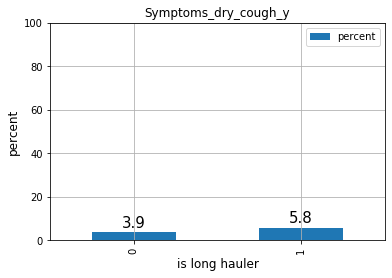

Symptoms_cough_with_mucus_ 
    long_hauler  count  total   percent
0            0   19.0    563  3.374778
1            1   34.0    893  3.807391


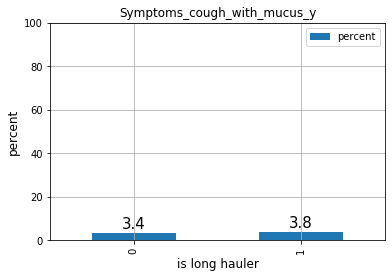

Symptoms_difficulty_breathing_/_shortness_of_breath_ 
    long_hauler  count  total   percent
0            0   32.0    563  5.683837
1            1   88.0    893  9.854423


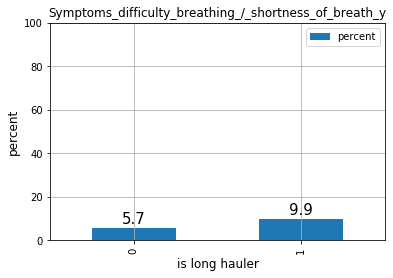

Symptoms_chest_tightness_ 
    long_hauler  count  total   percent
0            0   35.0    563  6.216696
1            1   57.0    893  6.382979


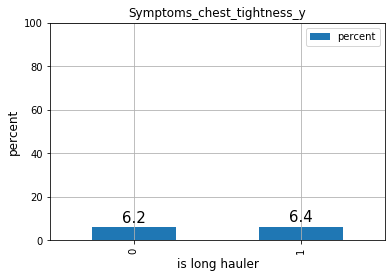

Symptoms_runny_nose_ 
    long_hauler  count  total   percent
0            0   30.0    563  5.328597
1            1   71.0    893  7.950728


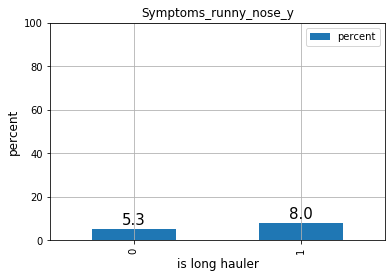

Symptoms_sore_throat_ 
    long_hauler  count  total   percent
0            0   17.0    563  3.019538
1            1   32.0    893  3.583427


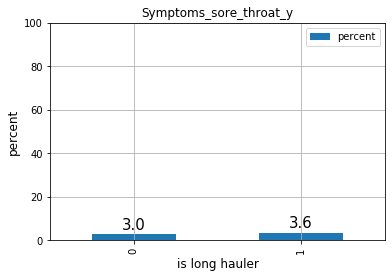

Symptoms_changes_in_food_flavor_ 
    long_hauler  count  total    percent
0            0   58.0    563  10.301954
1            1  411.0    893  46.024636


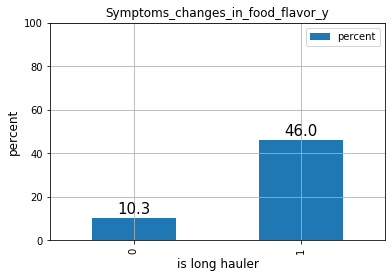

Symptoms_changes_in_smell_ 
    long_hauler  count  total    percent
0            0   82.0    563  14.564831
1            1  543.0    893  60.806271


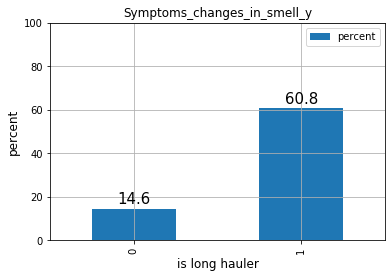

Symptoms_loss_of_appetite_ 
    long_hauler  count  total   percent
0            0    5.0    563  0.888099
1            1   82.0    893  9.182531


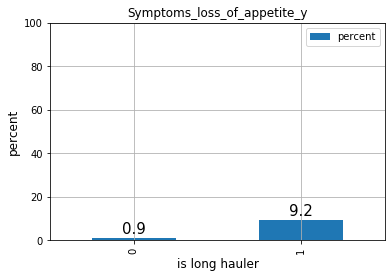

Symptoms_headache_ 
    long_hauler  count  total    percent
0            0   47.0    563   8.348135
1            1  139.0    893  15.565510


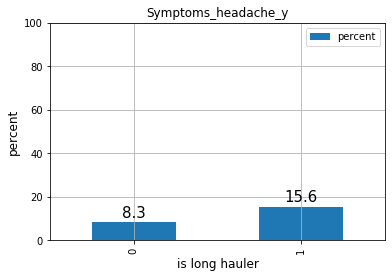

Symptoms_muscle_aches_ 
    long_hauler  count  total    percent
0            0   40.0    563   7.104796
1            1   96.0    893  10.750280


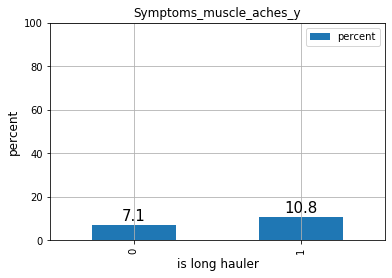

Symptoms_fatigue_ 
    long_hauler  count  total    percent
0            0   99.0    563  17.584369
1            1  255.0    893  28.555431


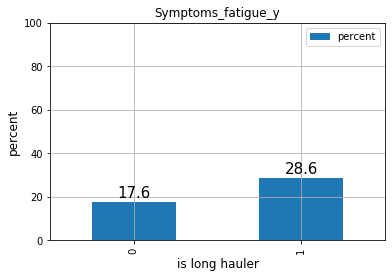

Symptoms_diarrhea_ 
    long_hauler  count  total   percent
0            0    9.0    563  1.598579
1            1   32.0    893  3.583427


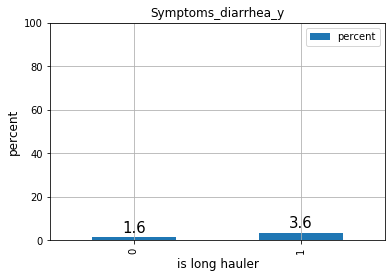

Symptoms_abdominal_pain_ 
    long_hauler  count  total   percent
0            0   19.0    563  3.374778
1            1   34.0    893  3.807391


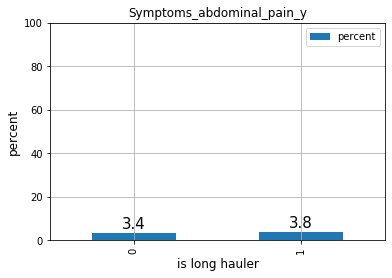

Symptoms_nausea_ 
    long_hauler  count  total   percent
0            0   13.0    563  2.309059
1            1   35.0    893  3.919373


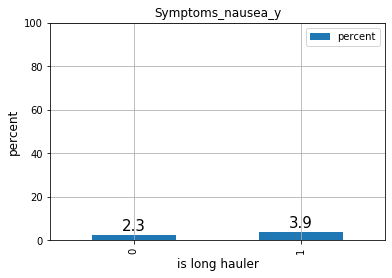

In [448]:
covid_positive = new_df.copy()
covid_positive = covid_positive.query('COVID_diagnosis_y == 2')
for i in symptom_columns:
    symptoms = covid_positive.groupby('longhauler').agg({(i+"y"): ['sum','count']}).reset_index()
    symptoms.columns = ['long_hauler','count','total']
    symptoms['percent'] = (symptoms['count'] / symptoms['total'])* 100
    
    print(i,"\n",symptoms)
#     symptoms['percent'].hist()
    splot = symptoms.plot('long_hauler','percent',kind="bar",ylim=(0,100),grid=True)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.title(i+"y")
    plt.ylabel('percent',size='12')
    plt.xlabel('is long hauler',size='12')
    plt.show()

# symptoms['percent'] = symptoms['sum'] / symptoms['count']

In [ ]:
covid_positive = new_df.copy()
covid_positive = covid_positive.query('COVID_diagnosis_y == 2')
for i in symptoms_columns:
    symptoms = covid_positive.groupby('longhauler').agg({(i+"x"): ['sum','count']}).reset_index()
    symptoms.columns = ['long_hauler','count','total']
    symptoms['percent'] = (symptoms['count'] / symptoms['total'])* 100
    
    print(i,"\n",symptoms)
#     symptoms['percent'].hist()
    splot = symptoms.plot('long_hauler','percent',kind="bar",ylim=(0,100),grid=True)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.title(i)
    plt.ylabel('percent',size='12')
    plt.xlabel('is long hauler',size='12')
    plt.show()

# symptoms['percent'] = symptoms['sum'] / symptoms['count']

In [195]:
# data['long_hauler'] = data['percentage_recovery'].apply(lambda x: 1 if x > 80 else 0)


In [ ]:
# Time between timestamp of first questionnaire and when they said they were sick 

# data['time_onset_timestmp_followup_timestmp'] = (((data['Email_Time_Stamp_y'] - data['Date_of_onset_Time_Stamp']).dt.total_seconds()) / (60 * 60 * 24))
# data['percentage_recovery_illness_to_current_smell'] = (data['Smell_current'] - data['Smell_during_illness'])

# data.plot.scatter(x='time_onset_timestmp_followup_timestmp',
#                       y='percentage_recovery_illness_to_current_smell', c='longhauler',cmap=plt.cm.coolwarm,sharex=False)
# plt.ylim(0, 100)
# # plt.title('a')
# plt.ylabel('difference in smell followup and during ',size='12')
# plt.xlabel('time from first questionnaire to followup',size='10')
# plt.tight_layout()

# plt.show()
